# Statystyka opisowa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## Statystyki próbkowe i metody opisu danych jakościowych

## Zadanie - podstawowe statystyki
Zaimplementować klase `Stats`, która posiada metody do wyznaczenia:

a) średniej arytmetycznej,
b) mediany,
c) wariancji,
d) odchylenia standardowego


dla dowolnej danych $X$.

In [11]:
class Stats:
    
    def __init__(self, vec):
        self.vec = vec
    
    def mean(self):
        return np.mean(self.vec)
    
    def median(self):
        return np.median(self.vec)
    
    def var(self):
        return np.var(self.vec, ddof = 1)
    
    def std(self):
        return np.sqrt(var(self.vec))
    
    # def std(self):
    #     return np.std(self.vec, ddof = 1)

    

In [16]:
X = [1, 15, 2, 84, 54, 3]

print(Stats(X).mean())
print(Stats(X).median())
print(Stats(X).var())
print(Stats(X).std())

26.5
9.0
1199.5
34.63379852109786


In [ ]:
?np.var

# ddof > 1 / N - ddof * sum(...)
# klaczyczna 1 / N
# nasza definicja 1 / (N - 1) => ddof = 1

In [20]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

stats = Stats(a)

In [21]:
print(stats.mean())
print(stats.median())
print(stats.var())
print(stats.std())

5.5
5.5
9.166666666666666
3.0276503540974917


## Zadanie - boxplot, szereg rozdzielczy, histogram
Firma budowlana zainteresowana jest jakością betonu. Jedną z pożądanych cech jest jego odpowiednia wytrzymałość na ściskanie. Aby sprawdzić, czy beton proponowany przez dostawcę spełnia normy jakości, przebadano 50 próbek i otrzymano następujące wyniki wytrzymałości na ściskanie:
6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 14.1, 18.1, 23. , 14.9, 27.3.

a) Obliczyć podstawowe statystyki próbkowe 

b) Sporządzić i opisać wykres skrzynkowy.

c) ***Zbudować szereg rozdzielczy.

d) Narysować histogram liczności.

e) Narysować histogram skumulowanych liczności.

In [14]:
beton = np.array([6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 
                   12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 
                   25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 
                   17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 
                   24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 
                   14.1, 18.1, 23. , 14.9, 27.3])

In [38]:
# a)

stats2 = Stats(beton)
print(stats2.mean())
print(stats2.median())
print(stats2.var())
print(stats2.std())

19.29
19.05
24.535204081632656
4.953302341027919


In [27]:
pd.DataFrame(beton).describe()

,0
count,51.000000
mean,26.754902
std,53.535104
min,6.200000
25%,16.000000
50%,19.100000
75%,22.750000
max,400.000000


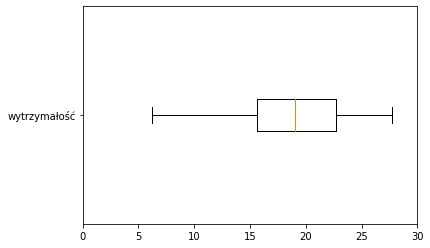

In [26]:
# b)

plt.boxplot(beton, vert=False, labels=["wytrzymałość"])
plt.xlim(0, 30)
plt.show()

In [40]:
print(beton.min(), beton.max())

6.2 27.7


In [27]:
q1 = np.quantile(beton, .25)
q3 = np.quantile(beton, .75)
print(q1, q3)

15.65 22.7


In [28]:
iqr = q3 - q1
print(iqr)

7.049999999999999


In [29]:
print(q1 - 3/2 * iqr, q3 + 3/2 * iqr)

5.075000000000001 33.275


In [ ]:
# c)

In [135]:
def freqdistro(vec, *args):
    
    vec = np.sort(vec)
    veclen = len(vec)
    
    try:
        k = args[0]
    except:
        k = int(7/8*np.sqrt(len(vec)))
    endpoints = np.append(np.arange(vec[0], vec[-1], (vec[-1] - vec[0]) / (k+1)), vec[-1])
    
    df = pd.DataFrame(columns=['Interval', 'n', 'f', 'cn', 'cf'])
    df['Interval'] = [f"({np.round(endpoints[i-1],2)}, {np.round(endpoints[i],2)}]" for i in range(1, len(endpoints))]
    df['Interval'].iloc[0] = "[" + df['Interval'].iloc[-1][1:]
    
    df['cn'] = [sum(vec <= elem) for elem in endpoints][1:]
    df['n'] = [df['cn'].iloc[0]] + [df['cn'].iloc[i] - df['cn'].iloc[i-1] for i in range(1, len(df['cn']))]
    df['f'] = df['n'] / veclen
    df['cf'] = df['f'].cumsum()
    
    #for index in df['Interval']:
        
    
    return df

In [139]:
# k = 6

# # wyznaczamy długośc klasy
# bmin = beton.min()
# bmax = beton.max()

# d = np.round((bmax - bmin) / k, 2)
# print(d)

# # wyznaczamy przedzialy klas
# left_bound = np.round(np.arange(bmin, bmax, d)[:k], 2)

# intervals = []
# n_size = np.zeros(k)

# # wyznaczamy szereg rozdzielczy
# make_interval = lambda x, y: "[{}, {})".format(x, y)
# make_closed_interval = lambda x, y: "[{}, {}]".format(x, y)

# for i in range(k-1):
#     l, r = left_bound[i], left_bound[i+1]
#     intervals.append(make_interval(l, r))
#     n_size[i] = np.sum((beton >= l) & (beton < r))
         
# l, r = left_bound[k-1], bmax
# intervals.append(make_closed_interval(l, r))
# n_size[k-1] = np.sum((beton >= l) & (beton <= r))

# f = n_size / beton.size
# frequency_distribution = pd.DataFrame({'Interval': np.array(intervals), 
#                                        'n': n_size, 'f': f, 
#                                       'cn': np.cumsum(n_size), 'cf': np.cumsum(f)})
# frequency_distribution

In [140]:
df = freqdistro(beton, 5)
df

,Interval,n,f,cn,cf
0,"[24.12, 27.7]",2,0.04,2,0.04
1,"(9.78, 13.37]",3,0.06,5,0.10
2,"(13.37, 16.95]",11,0.22,16,0.32
3,"(16.95, 20.53]",11,0.22,27,0.54
4,"(20.53, 24.12]",13,0.26,40,0.80
5,"(24.12, 27.7]",10,0.20,50,1.00


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

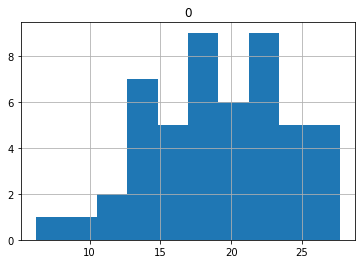

In [141]:
# d)

pd.DataFrame(beton).hist()

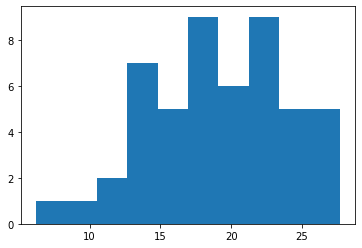

In [142]:
plt.hist(beton)
plt.show()

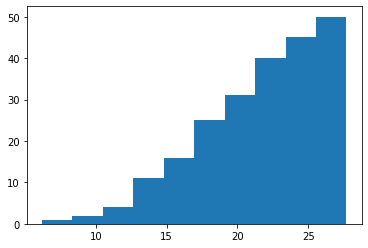

In [143]:
plt.hist(beton, cumulative=True)
plt.show()

## Zadanie - porównanie średniej arytmetycznej i mediany
Wczytaj dane `stats1.csv` opisujące pomiar pewnej długości przez dwóch różnych ekspertów. Porównaj ich rozkład oraz statystyki próbkowe.

In [3]:
stats1 = pd.read_csv('../data/stats1.csv')
stats1.head(5)

,x,y
0,10.968388,10.481487
1,11.035494,13.211230
2,3.805479,3.954873
3,3.402634,5.367647
4,7.527793,7.234025


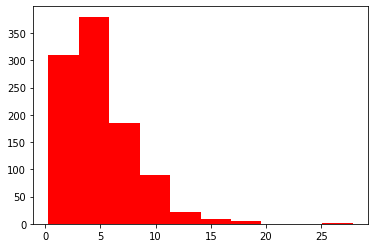

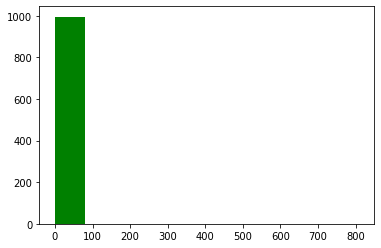

In [4]:
plt.hist(stats1.x, color='r')
plt.show()

plt.hist(stats1.y, color='g')
plt.show()

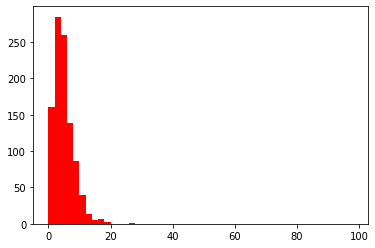

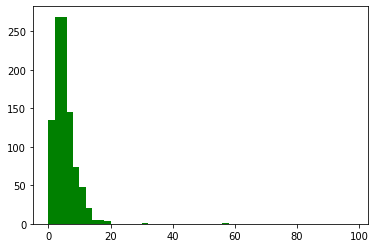

In [5]:
plt.hist(stats1.x, bins = np.arange(0, 100, 2), color='r')
plt.show()

plt.hist(stats1.y, bins = np.arange(0, 100, 2), color='g')
plt.show()

In [55]:
stats1.describe()

,x,y
count,1000.000000,1000.000000
mean,4.956962,6.523673
std,3.165879,28.577406
min,0.289994,-1.198420
25%,2.660315,2.736644
50%,4.414328,4.530463
75%,6.575814,6.822966
max,27.866537,808.876344


In [ ]:
# obserwacje odstajace => porwnanie wartosci z wysokim percentylem 

In [57]:
np.quantile(stats1.y, 0.99)

17.12382504029725

In [56]:
stats1.y[np.where(stats1.y > np.quantile(stats1.y, 0.99))[0]]

103     30.095229
158    808.876344
240     17.864930
323     18.376594
380     99.305207
467     56.603880
524     18.773622
592    214.653314
658     18.098880
699    329.789401
Name: y, dtype: float64

In [58]:
np.quantile(stats1.x, 0.99)

15.228123983307201

In [59]:
stats1.x[np.where(stats1.x > np.quantile(stats1.x, 0.99))[0]]

103    27.866537
240    18.567657
323    18.175175
357    16.665207
428    16.983643
503    16.255930
524    17.507817
658    17.966354
687    16.704449
892    16.168756
Name: x, dtype: float64

In [ ]:
# porównywanie danych z odchyleniem standardowym => 3 * std

In [61]:
stats1.y[np.where(stats1.y > 3 *  np.std(stats1.y, ddof=1))[0]]

158    808.876344
380     99.305207
592    214.653314
699    329.789401
Name: y, dtype: float64

In [62]:
stats1.x[np.where(stats1.x > 3 * np.std(stats1.x, ddof=1))[0]]

0      10.968388
1      11.035494
11      9.516011
12     10.238225
21     10.866259
         ...    
946    13.879620
952    12.253985
961     9.913486
968     9.862946
995    11.844055
Name: x, Length: 83, dtype: float64

## Zadanie - współczynnik rozproszenia
Wczytaj dane `stats2.csv` zawierające pomiary wagi słoni i myszy w pewnym zoo (w gramach). Wyznacz statystyki próbkowe i oceń, która próbka, opisująca wagę słoni, czy opisująca wagę myszy, ma większe rozproszenie wartości.

In [63]:
weight = pd.read_csv('../data/stats2.csv')
weight.head(5)

,elephant,mouse
0,3883240.0,21.0
1,4046450.0,18.0
2,4152119.0,22.0
3,2578306.0,23.0
4,3597481.0,25.0


In [64]:
weight.describe()

,elephant,mouse
count,1.000000e+02,100.000000
mean,4.017328e+06,20.470000
std,4.998078e+05,2.886594
min,2.578306e+06,13.000000
25%,3.685120e+06,19.000000
50%,4.046994e+06,20.000000
75%,4.380402e+06,22.000000
max,5.246947e+06,27.000000


In [65]:
weight.describe().loc['std']

elephant    499807.845364
mouse            2.886594
Name: std, dtype: float64

**Uwaga**: W sytuacji, gdy chcemy porównanć rozrzut dwóch lub więcej prób, nieraz wygodniej jest skorzystać ze względnej miary rozproszenia - **współczynnika rozproszenia**:
$$
V = \frac{S}{\overline{X}}\cdot 100\%.
$$


In [66]:
weight.describe().loc['std'] / weight.describe().loc['mean']

elephant    0.124413
mouse       0.141016
dtype: float64

## Miara korelacji — współczynnik korelacji Pearsona

W przypadku jednoczesnego badania dwóch cech pewnej populacji naszą próbą jest ciąg par $$(X_1, Y_1),\ldots,(X_n, Y_n),$$ gdzie $X_i$ oraz $Y_i$ oznaczają, odpowiednio, wartości pierwszej i drugiej cechy przyjmowane przez $i$-ty element próby.

Wówczas **współczynnik korelacji Pearsona** jest dany wzorem
\begin{equation*}
    r = \frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2\sum_{i=1}^n(Y_i-\overline{Y})^2}}.
\end{equation*}

In [72]:
from scipy import stats

In [ ]:
?np.corrcoef

In [69]:
x = [1, 2, 3]
y = [4, 1, 6]
np.corrcoef(x, y)

array([[1.        , 0.39735971],
       [0.39735971, 1.        ]])

In [70]:
np.corrcoef(x, y)[0, 1]

0.3973597071195132

## Zadanie - korelacja liniowa
Wygeneruj próbkę $X$ z wybranego przez siebie rozkładu i oblicz wartość elementów próbki $Y$ zgodnie ze wzorem

a) $Y = X$,

b) $Y = 5X$,

c) $Y = -5X$,

d) $Y = X^2$,

f) $Y = \exp(X)$,

g) $Y = \sin(X)$, 

a następnie oblicz współczynnik korelacji pomiędzy zmiennymi $X$ i $Y$.

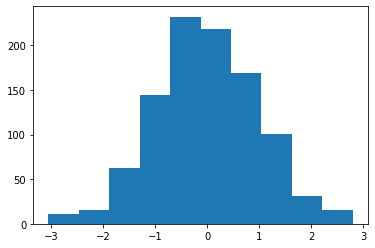

In [7]:
x = stats.norm.rvs(size=1000)
plt.hist(x)
plt.show()

In [8]:
f1 = lambda a, x: a * x
f2 = lambda x, a: x ** a
f3 = lambda x: np.exp(x)
f4 = lambda x: np.sin(x)

ya = f1(1, x)
yb = f1(5, x)
yc = f1(-5, x)
yd = f2(x, 2)
yf = f3(x)
yg = f4(x)

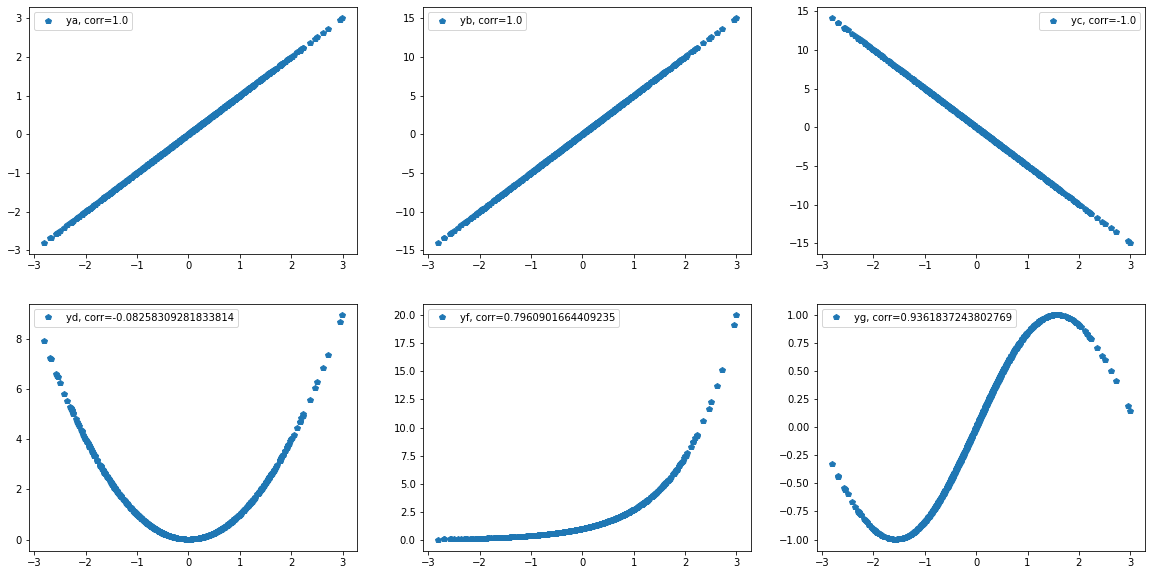

In [77]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].plot(x, ya, "p", label = "ya, corr={}".format(np.corrcoef(x, ya)[0, 1]))
ax[0, 0].legend(loc="best")


ax[0, 1].plot(x, yb, "p", label = "yb, corr={}".format(np.corrcoef(x, yb)[0, 1]))
ax[0, 1].legend(loc="best")


ax[0, 2].plot(x, yc, "p", label = "yc, corr={}".format(np.corrcoef(x, yc)[0, 1]))
ax[0, 2].legend(loc="best")


ax[1, 0].plot(x, yd, "p", label = "yd, corr={}".format(np.corrcoef(x, yd)[0, 1]))
ax[1, 0].legend(loc="best")


ax[1, 1].plot(x, yf, "p", label = "yf, corr={}".format(np.corrcoef(x, yf)[0, 1]))
ax[1, 1].legend(loc="best")


ax[1, 2].plot(x, yg, "p", label = "yg, corr={}".format(np.corrcoef(x, yg)[0, 1]))
ax[1, 2].legend(loc="best")

**Wniosek**:
- zerowa korelacja nie oznacza braku zależności, np. związek $y=x^2$.

## Zadanie - korelacja liniowa
Wygeneruj $n$ par niezależnych zmiennych losowych, dla każdej z nich wyznacz współczynnik korelacji, a następnie sprawdź rozkład otrzymanych współczynników.

In [80]:
n = 1000
n_samples = 100

corr = np.zeros(n)

for i in range(n):
    x = stats.norm.rvs(size=n_samples)
    y = stats.uniform.rvs(size=n_samples, loc=-2, scale=4)
    corr[i] = np.corrcoef(x, y)[0, 1]

In [81]:
pd.DataFrame(corr).describe()

,0
count,1000.000000
mean,0.002140
std,0.101967
min,-0.308294
25%,-0.068203
50%,-0.001683
75%,0.077728
max,0.294265


(array([  4.,  27.,  73., 148., 220., 205., 175., 101.,  41.,   6.]),
 array([-0.30829421, -0.24803826, -0.18778232, -0.12752637, -0.06727042,
        -0.00701447,  0.05324148,  0.11349743,  0.17375338,  0.23400932,
         0.29426527]),
 <BarContainer object of 10 artists>)

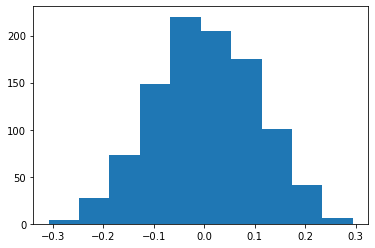

In [82]:
plt.hist(corr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4a0f9cee50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4a0f9cc550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4a0f9ceaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4a0f9ccc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4a0f9ccf70>],
 'means': []}

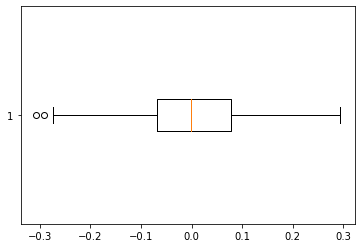

In [83]:
plt.boxplot(corr, vert=False)

**Wniosek**: Niezależne zmienne losowe moga mieć niezerową korelację.

## Zadanie - do domu
Wczytaj zbiór danych `boston_prediction.csv`, który zawiera dane z predykcji dwóch modeli cen mieszkań w Bostonie (więcej na temat zbioru, na podstawie, którego zbudowano modele możesz przeczytać, np. https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html).

Oceń jakość predykcji obu modeli: policz średnią, medianę, kwantyl rzędu 90% oraz odchylenie standardowe dla błędu bezwzględnego i względnego oraz korelację wartości przewidywanych z prawdziwymi. Wyciągnąć wnioski na temat działania obu modeli.

**Wskazówka**:

**Błąd bezwzględny** liczymy ze wzoru:
$$
\Delta x = |x-x_0|.
$$

**Błąd względny** liczymy ze wzoru:
$$
\delta = \frac{\Delta x}{x}.
$$

Oznaczenia: $x$ - wartość dokładna, $x_0$ - wartość zmierzona.

In [9]:
# https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

/home/mikolaj/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [10]:
boston_pred = pd.read_csv("../data/boston_prediction.csv")
boston_pred.head(5)

,price,model_pred,model_pred2
0,24.0,30.0,27.4
1,21.6,25.0,21.7
2,34.7,30.6,33.7
3,33.4,28.6,33.7
4,36.2,27.9,33.7


In [16]:
boston_pred["model1_abserr"] = abs(boston_pred["model_pred"] - boston_pred["price"])
boston_pred["model2_abserr"] = abs(boston_pred["model_pred2"] - boston_pred["price"])
boston_pred["model1_relerr"] = boston_pred["model1_abserr"] / boston_pred["price"]
boston_pred["model2_relerr"] = boston_pred["model2_abserr"] / boston_pred["price"]

In [17]:
boston_pred.head(5)

,price,model_pred,model_pred2,model1_abserr,model2_abserr,model1_relerr,model2_relerr
0,24.0,30.0,27.4,6.0,3.4,0.250000,0.141667
1,21.6,25.0,21.7,3.4,0.1,0.157407,0.004630
2,34.7,30.6,33.7,4.1,1.0,0.118156,0.028818
3,33.4,28.6,33.7,4.8,0.3,0.143713,0.008982
4,36.2,27.9,33.7,8.3,2.5,0.229282,0.069061


In [19]:
boston_pred.describe([.01, .5, .99])

,price,model_pred,model_pred2,model1_abserr,model2_abserr,model1_relerr,model2_relerr
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,22.532016,22.539921,3.269565,2.909881,0.164097,0.154650
std,9.197104,7.913610,8.258947,3.349465,2.791767,0.185470,0.193455
min,5.000000,-4.300000,12.000000,0.000000,0.000000,0.000000,0.000000
1%,7.010000,4.045000,12.000000,0.000000,0.005000,0.000000,0.000148
50%,21.200000,22.100000,21.700000,2.450000,2.300000,0.114476,0.102473
99%,50.000000,40.990000,45.100000,15.590000,14.410000,0.903474,1.141270
max,50.000000,44.700000,45.100000,26.200000,23.200000,1.614286,1.533333


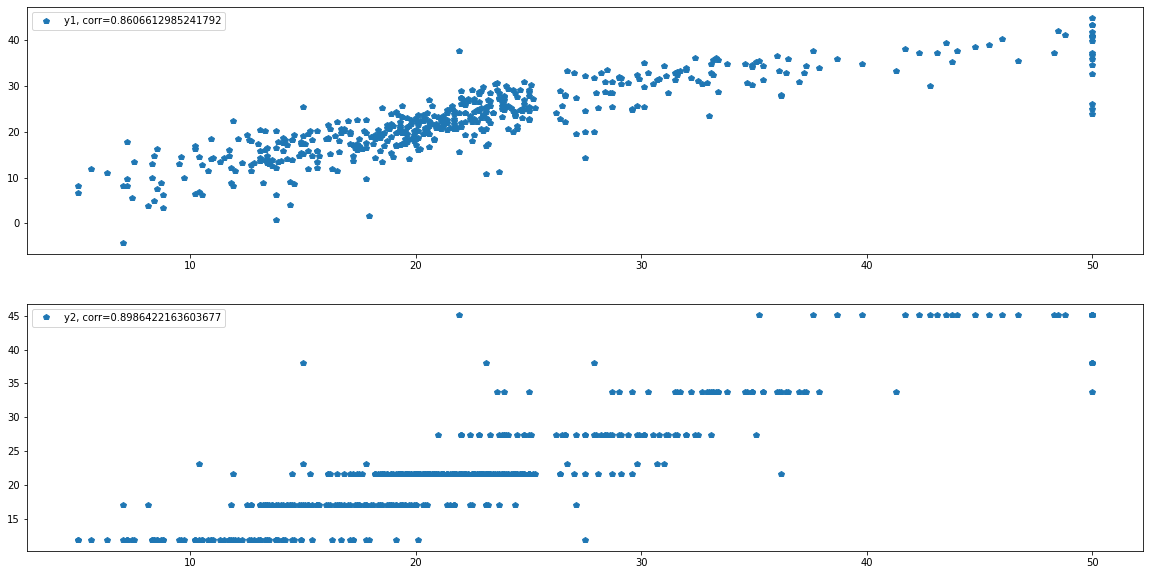

In [26]:
x = boston_pred["price"]
y1 = boston_pred["model_pred"]
y2 = boston_pred["model_pred2"]

fig, ax = plt.subplots(2, 1, figsize=(20, 10))

ax[0].plot(x, y1, "p", label = f"y1, corr={np.corrcoef(x, y1)[0, 1]}")
ax[0].legend(loc="best")

ax[1].plot(x, y2, "p", label = f"y2, corr={np.corrcoef(x, y2)[0, 1]}")
ax[1].legend(loc="best")